In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, Markdown

In [197]:
# Trae la base de datos 
heart_disease = fetch_ucirepo(id=45)  
  
# variable information 
print(heart_disease.variables) 

# Combinarlos
df = heart_disease.data.original.copy()

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [198]:
# Data frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [200]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

revisamos cuanto reprecentan los datos faltantes en la base de datos

In [201]:
(df.isnull().sum() * 100) / 302

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.324503
thal        0.662252
num         0.000000
dtype: float64

## Variables cuantitativas 
<ul>
    <li>age</li>
    <li>trestbps (resting blood pressure) </li>
    <li>chol (serum cholestoral)</li>
    <li>thalach (maximum heart rate achieved)</li>
    <li>oldpeak (ST depression induced by exercise relative to rest)</li>
</ul>

## Variables cualitativas
<ul>
    <li>sex</li>
    <li>cp (chest pain)</li>
    <li>fbs (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)</li>
    <li>restecg (resting electrocardiographic results)</li>
    <li>exang (exercise induced angina) (1 = yes; 0 = no)</li>
    <li>slope (the slope of the peak exercise ST segment)</li>
    <li>thal (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>ca (number of major vessels (0-3) colored by flourosopy)</li>
</ul>


### Estadistica Descriptiva

In [202]:
# Variables Cuantitativas
cuantitativas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_cuantitativas = df[cuantitativas]

df_cuantitativas.describe()



,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [203]:
# Variables Cualitativas
cualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

estadisticas = []

for col in cualitativas:
    count = df[col].count()
    unique = df[col].nunique()
    top = df[col].mode().iloc[0] if not df[col].mode().empty else None
    freq = df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None
    estadisticas.append({
        'Variable': col,
        'Count': count,
        'Unique': unique,
        'Top (Moda)': top,
        'Freq': freq
    })

df_estadisticas = pd.DataFrame(estadisticas)
df_estadisticas


,Variable,Count,Unique,Top (Moda),Freq
0,sex,303,2,1.0,206
1,cp,303,4,4.0,144
2,fbs,303,2,0.0,258
3,restecg,303,3,0.0,151
4,exang,303,2,0.0,204
5,slope,303,3,1.0,142
6,thal,301,3,3.0,166
7,ca,299,4,0.0,176


### Boxplot Cuantitativas

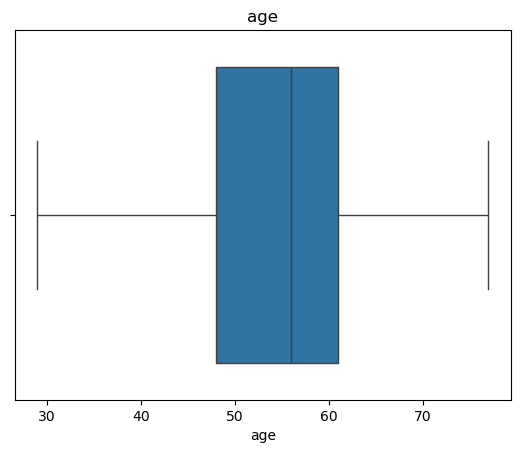

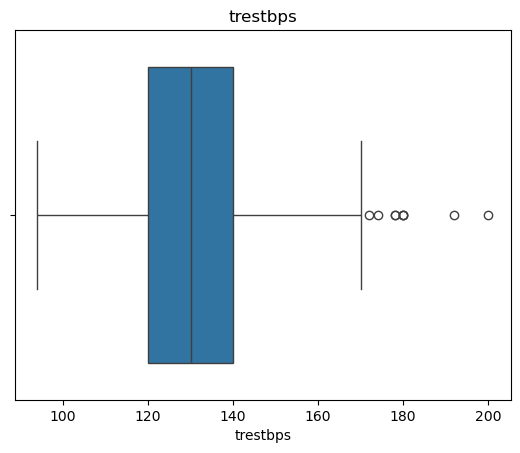

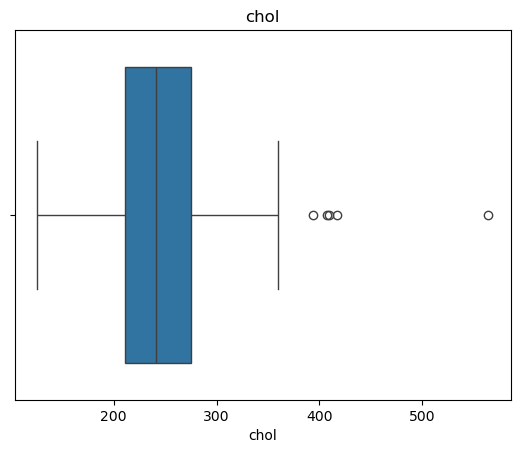

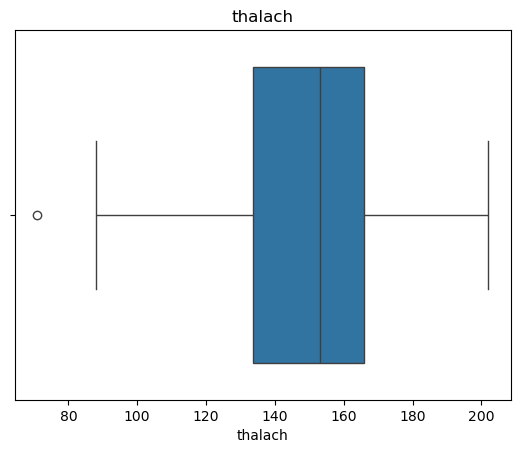

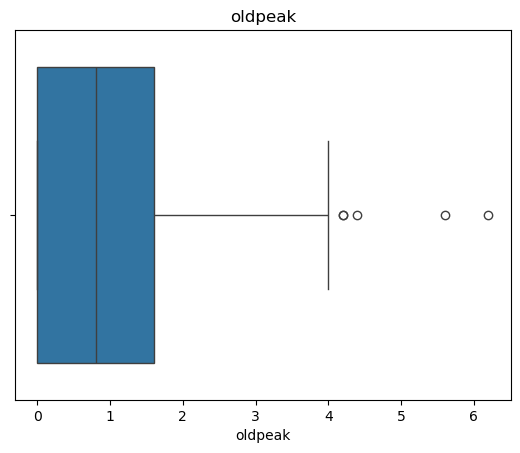

In [204]:
# Poner las variables categorícas como object
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'slope']
df[categoricas] = df[categoricas].astype(object)

# separar las variables numericas
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Muestra el boxplot de cada una de las variables
for col in cols:
    sns.boxplot(x=col, data = df)
    plt.title(col)
    plt.show()

### Histogramas

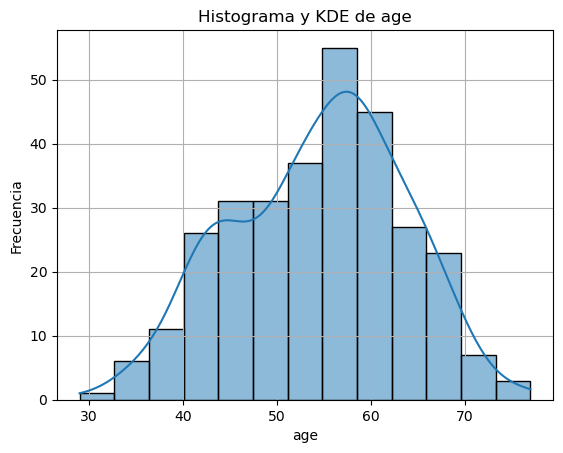

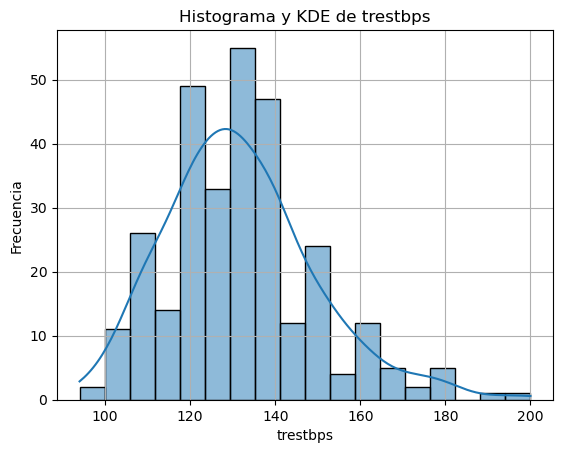

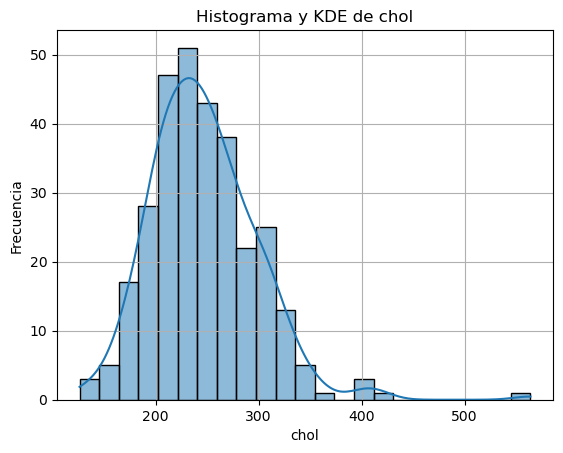

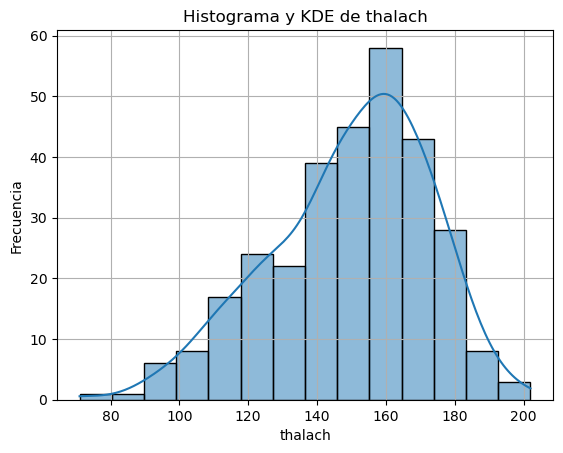

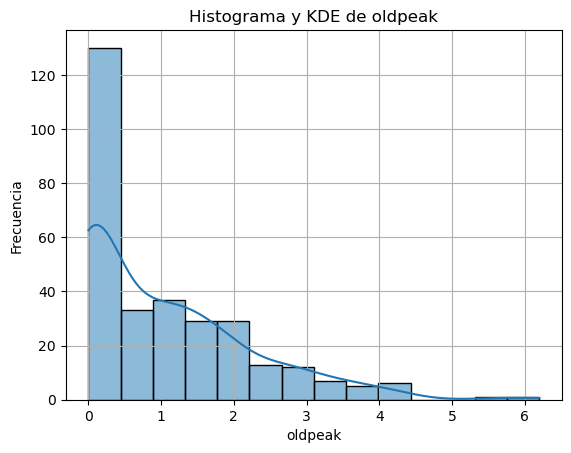

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables numéricas
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Graficar histograma con KDE para cada variable
for col in cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histograma y KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


### Diagrama de Barras

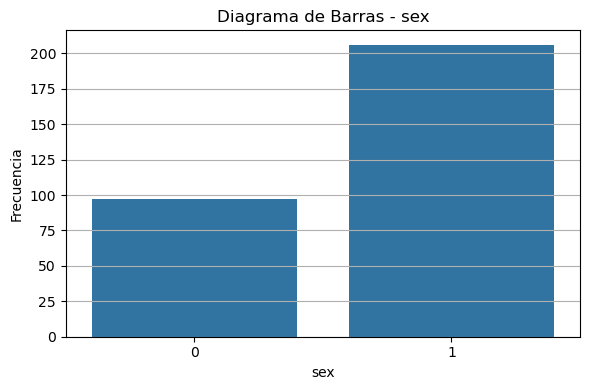

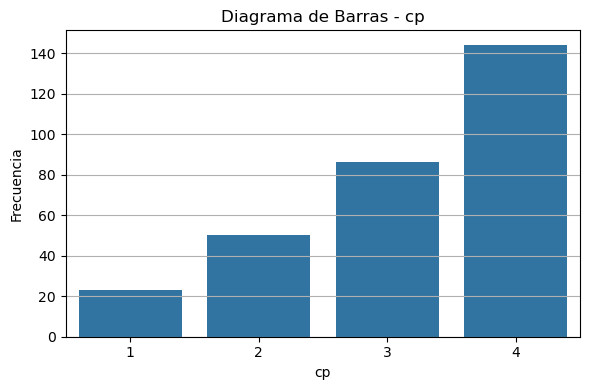

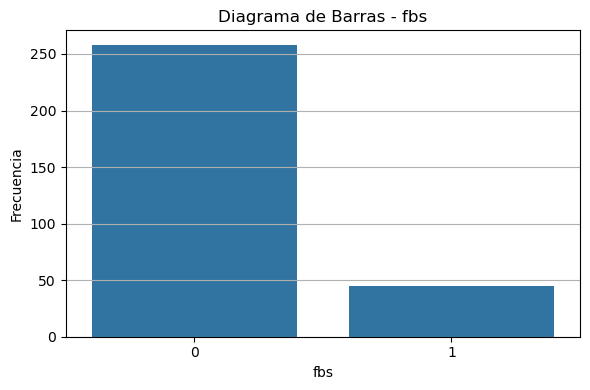

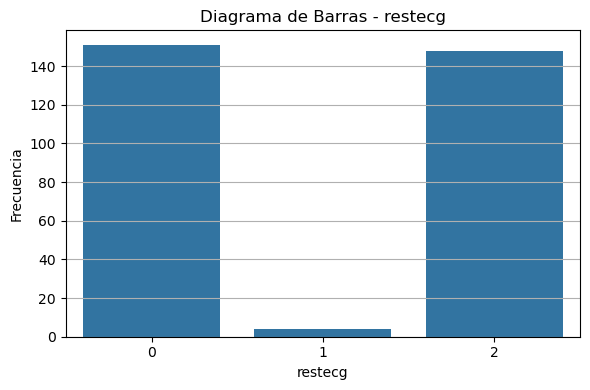

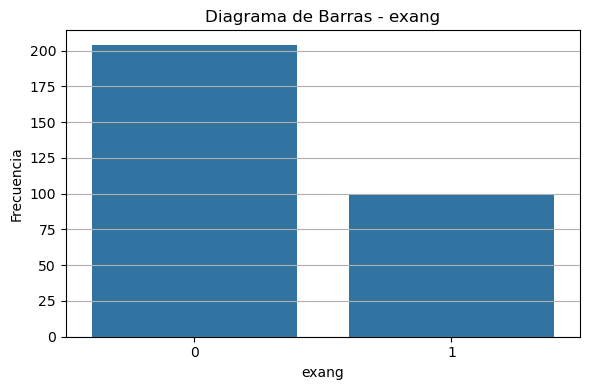

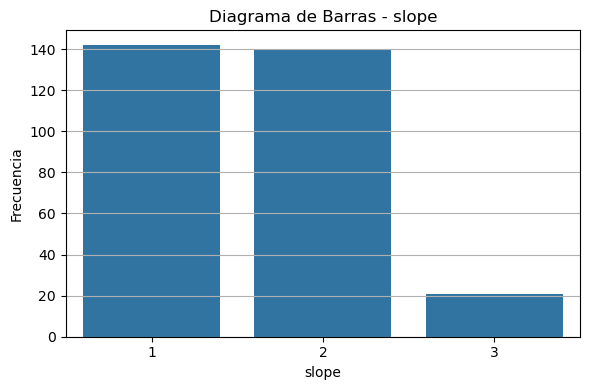

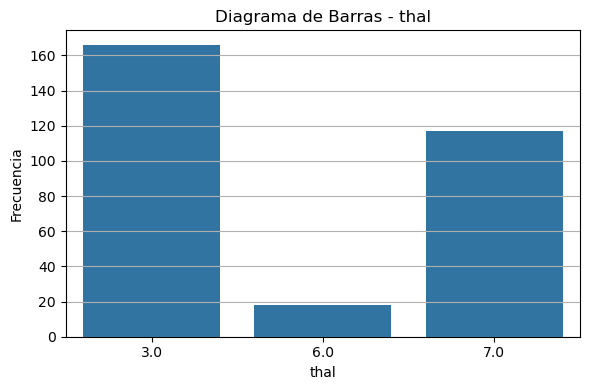

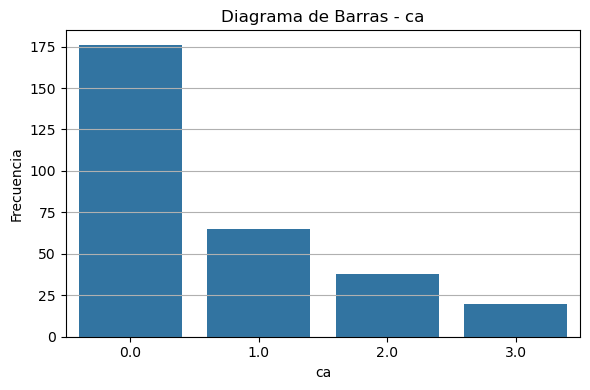

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables cualitativas
cualitativas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

# Crear un gráfico de barras para cada variable
for col in cualitativas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Diagrama de Barras - {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Usamos los boxplots, histogramas y diagramas de barras para identificar los outliers de cada una de las variables y analizar la distribucion de los features.

## Datos faltantes

Las unicas variables que presentan datos faltantes son ca y thal, como estos representan menos del 5 porciento del total de los datos podemos imputar los datos faltantes

In [207]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [208]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'{col}: {df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]} outliers')
    if col == 'oldpeak':
        # trata oldpeak con clip (se trata aca por que se necesitan los limites del boxplot)
        df[col] = df[col].clip(lim_inf, lim_sup)

age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 5 outliers


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25308\558505138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lim_inf, lim_sup)


In [209]:
df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
df['thalach'] = winsorize(df['thalach'], limits=[0.05, 0.05])
df['ca'] = winsorize(df['thalach'], limits=[0.05, 0.05])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25308\308335225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25308\308335225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25308\308335225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [210]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'{col}: {df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]} outliers')

age: 0 outliers
trestbps: 0 outliers
chol: 0 outliers
thalach: 0 outliers
oldpeak: 0 outliers


c:\Users\Usuario\anaconda3\envs\fundamentos_python\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Usuario\anaconda3\envs\fundamentos_python\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Usuario\anaconda3\envs\fundamentos_python\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Usuario\anaconda3\envs\fundamentos_python\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Usuario\anaconda3\envs\fundamentos_python\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.p

In [211]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(cat_cols))

# Aplicar One-Hot Encoding si hay categóricas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop(columns='num')
y = df['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame con nombres originales
X = pd.DataFrame(X_scaled, columns=X.columns)

# Confirmar
print(" Preprocesamiento completo. Datos listos para modelar.")
df['num'].unique()


Variables categóricas: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
 Preprocesamiento completo. Datos listos para modelar.


array([0, 2, 1, 3, 4])

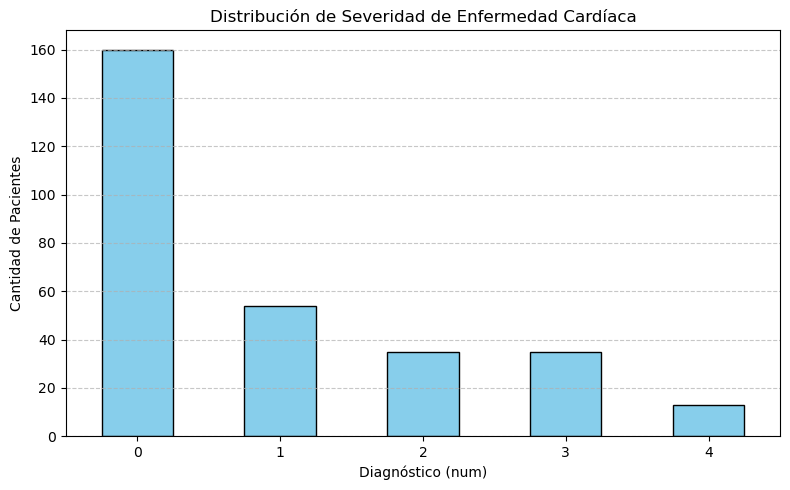

In [212]:
value_counts = df['num'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribución de Severidad de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (num)')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

num
0    160
1    137
Name: count, dtype: int64


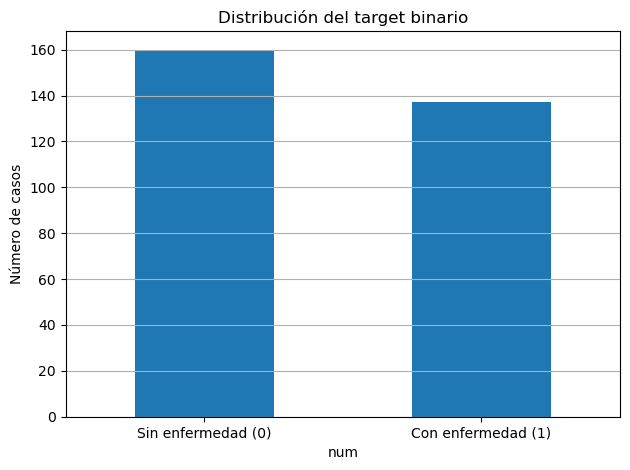

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
# Supongamos que ya recodificaste la variable
y = y.apply(lambda x: 1 if x > 0 else 0)

# Ver distribución
class_counts = y.value_counts()
print(class_counts)

# Diagrama de barras
class_counts.plot(kind='bar')
plt.title("Distribución del target binario")
plt.xticks([0, 1], ['Sin enfermedad (0)', 'Con enfermedad (1)'], rotation=0)
plt.ylabel("Número de casos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# SMOTE

In [214]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

Distribución de clases en y_smote:
num
0    160
1    160
Name: count, dtype: int64


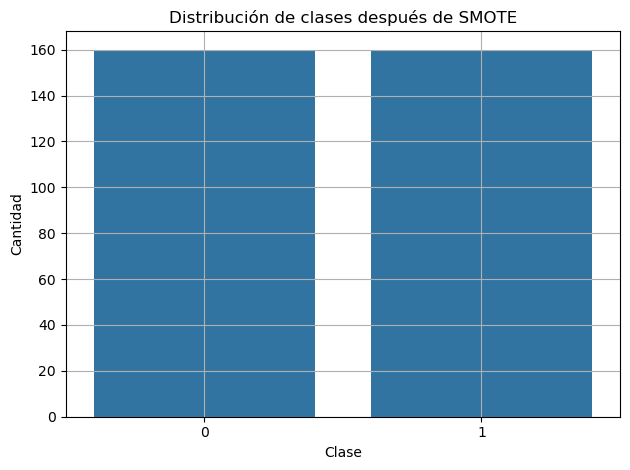

In [215]:
try:
    print("Distribución de clases en y_smote:")
    print(y_smote.value_counts())

    sns.countplot(x=y_smote)
    plt.title("Distribución de clases después de SMOTE")
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
except NameError:
    print(" La variable 'y_smote' no existe. Asegúrate de haber ejecutado el bloque de SMOTE.")

# Undersampling

In [216]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

Distribución de clases en y_smote:
num
0    137
1    137
Name: count, dtype: int64


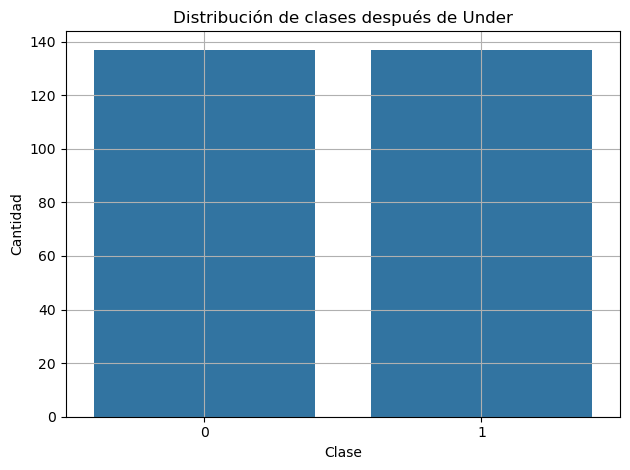

In [217]:

try:
    print("Distribución de clases en y_smote:")
    print(y_under.value_counts())

    sns.countplot(x=y_under)
    plt.title("Distribución de clases después de Under")
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
except NameError:
    print("La variable 'y_under' no existe.")

# Pipelines SMOTE
## Logistic regresion

Hold-Out
Accuracy: 0.7916666666666666


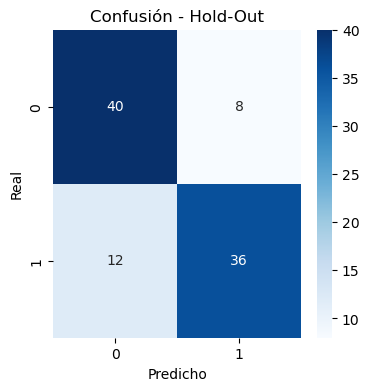

K-Fold
Accuracy: 0.796875


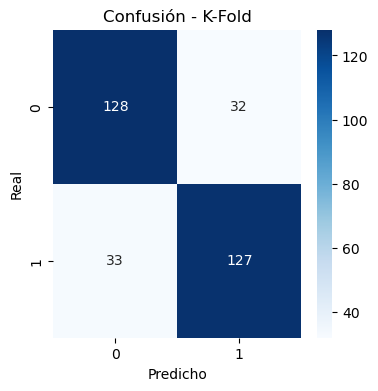

Stratified K-Fold
Accuracy: 0.790625


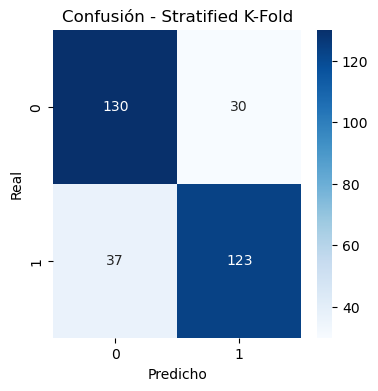

LOOCV (Leave-One-Out)
Accuracy: 0.790625


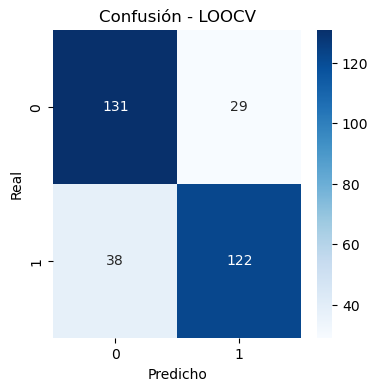

In [218]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
# Para ahorrar tiempo, podrías usar un subconjunto si tienes muchos datos:
# X_loo, y_loo = X[:100], y[:100]
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")

In [219]:
import pandas as pd

accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0             K-Fold  0.796875
1           Hold-Out  0.791667
2  Stratified K-Fold  0.790625
3              LOOCV  0.790625


Como K-fold es el que mejor accuracy tiene es el que vamos a utilizar para analizar

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
print("Precision:", precision_score(y_smote, y_pred_kf_SMOTE))
print("Recall:", recall_score(y_smote, y_pred_kf_SMOTE))
print("F1-score:", f1_score(y_smote, y_pred_kf_SMOTE))

Accuracy: 0.796875
Precision: 0.7987421383647799
Recall: 0.79375
F1-score: 0.7962382445141066


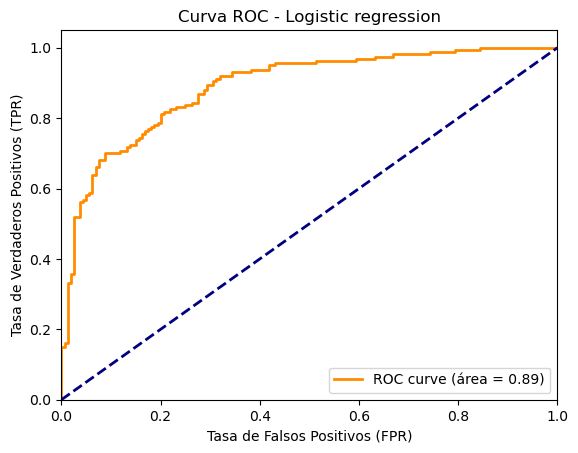

In [221]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Obtenemos las probabilidades predichas para la clase positiva (por ejemplo, clase 1)
y_prob_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf, method='predict_proba')[:, 1]

# Calculamos FPR, TPR y thresholds para la curva ROC
fpr, tpr, thresholds = roc_curve(y_smote, y_prob_kf_SMOTE)

# Calculamos el AUC (Area Under Curve)
roc_auc = roc_auc_score(y_smote, y_prob_kf_SMOTE)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Logistic regression')
plt.legend(loc="lower right")
plt.show()

## SVM

Hold-Out
Accuracy: 0.8229166666666666


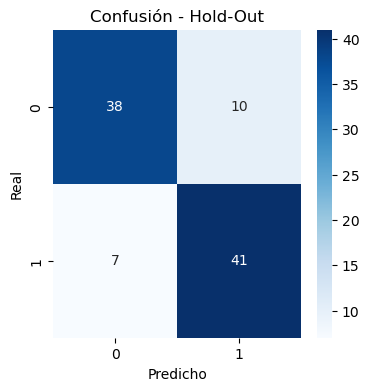

K-Fold
Accuracy: 0.81875


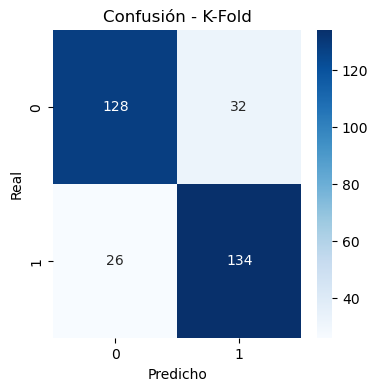

Stratified K-Fold
Accuracy: 0.790625


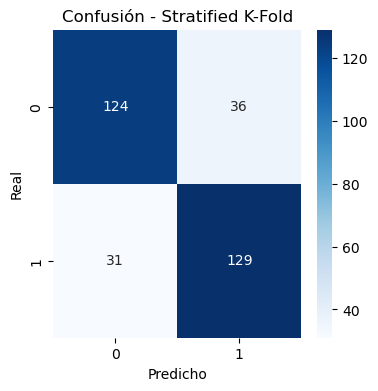

LOOCV (Leave-One-Out)
Accuracy: 0.803125


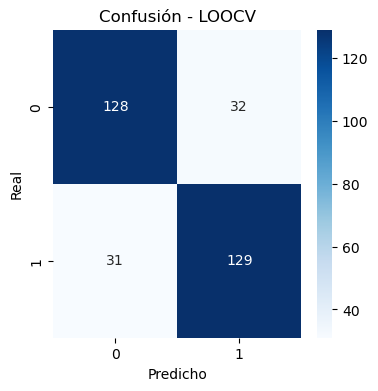

In [222]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
# Para ahorrar tiempo, podrías usar un subconjunto si tienes muchos datos:
# X_loo, y_loo = X[:100], y[:100]
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")

In [223]:
accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))




              Método  Accuracy
0           Hold-Out  0.822917
1             K-Fold  0.818750
2              LOOCV  0.803125
3  Stratified K-Fold  0.790625


Como Hold-Out es el que mejor accuracy tiene, es el que vamos a utilizar para analizar

In [224]:
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Precision:", precision_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Recall:", recall_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("F1-score:", f1_score(y_test_SMOTE, y_pred_holdout_SMOTE))


Accuracy: 0.8229166666666666
Precision: 0.803921568627451
Recall: 0.8541666666666666
F1-score: 0.8282828282828283


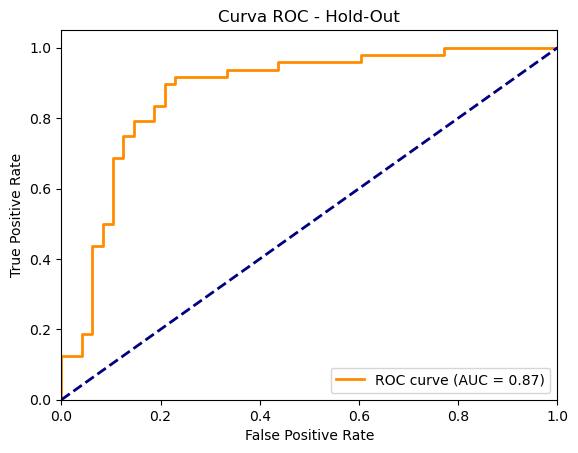

In [225]:
y_prob_holdout_SMOTE = pipeline.predict_proba(X_test_SMOTE)[:, 1]

# Calcula los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_prob_holdout_SMOTE)

# Calcula el AUC
roc_auc = roc_auc_score(y_test_SMOTE, y_prob_holdout_SMOTE)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Hold-Out')
plt.legend(loc="lower right")
plt.show()

## Knn

Hold-Out
Accuracy: 0.8020833333333334


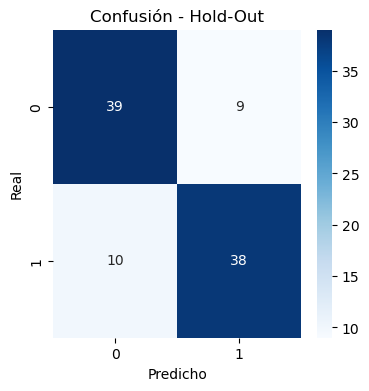

K-Fold
Accuracy: 0.784375


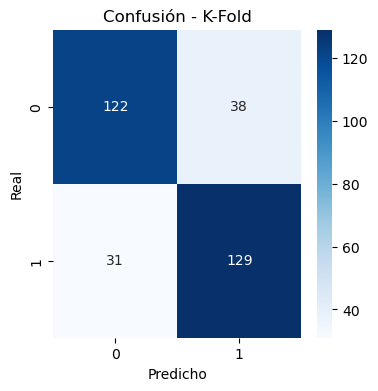

Stratified K-Fold
Accuracy: 0.79375


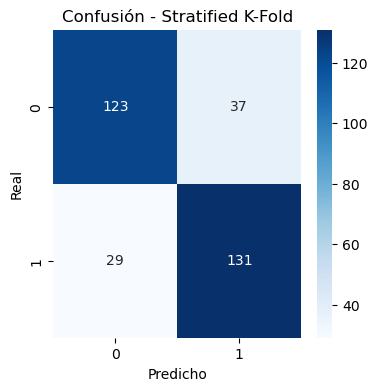

LOOCV (Leave-One-Out)
Accuracy: 0.775


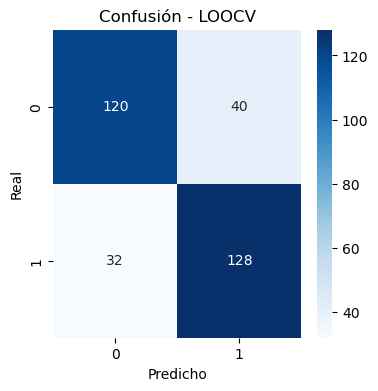

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict
from sklearn.metrics import accuracy_score

# Crear el pipeline con KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")


In [227]:
accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

              Método  Accuracy
0           Hold-Out  0.802083
1  Stratified K-Fold  0.793750
2             K-Fold  0.784375
3              LOOCV  0.775000


El mejor accuracy fue el de Hold-out asi que procedemos a analizar por medio de este

In [228]:
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Precision:", precision_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Recall:", recall_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("F1-score:", f1_score(y_test_SMOTE, y_pred_holdout_SMOTE))


Accuracy: 0.8020833333333334
Precision: 0.8085106382978723
Recall: 0.7916666666666666
F1-score: 0.8


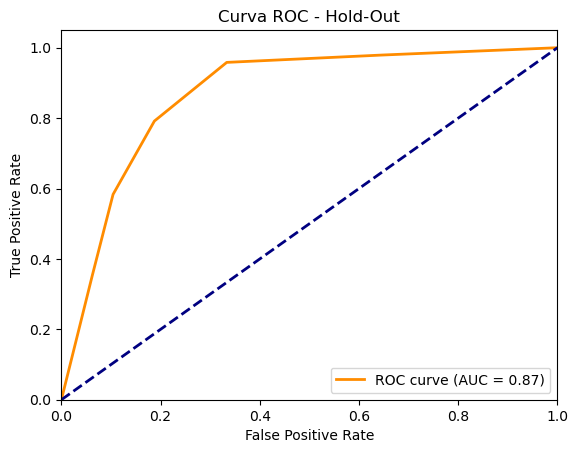

In [229]:
y_prob_holdout_SMOTE = pipeline.predict_proba(X_test_SMOTE)[:, 1]

# Calcula los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_prob_holdout_SMOTE)

# Calcula el AUC
roc_auc = roc_auc_score(y_test_SMOTE, y_prob_holdout_SMOTE)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Hold-Out')
plt.legend(loc="lower right")
plt.show()

## Árbol de decisión (modelo base)

Hold-Out
Accuracy: 0.6875


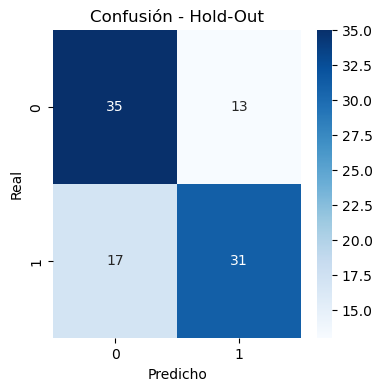

K-Fold
Accuracy: 0.7375


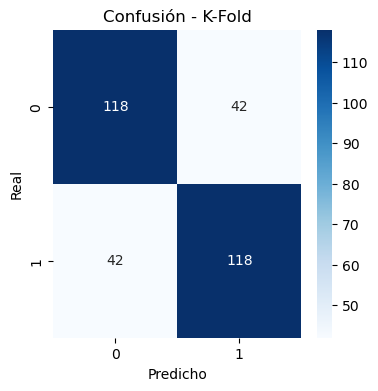

Stratified K-Fold
Accuracy: 0.734375


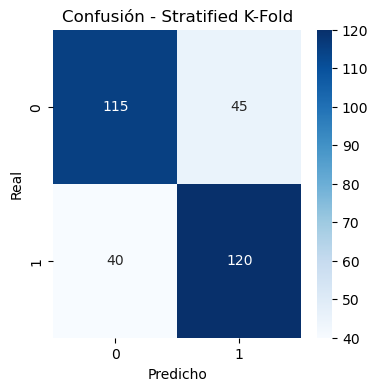

LOOCV (Leave-One-Out)
Accuracy: 0.753125


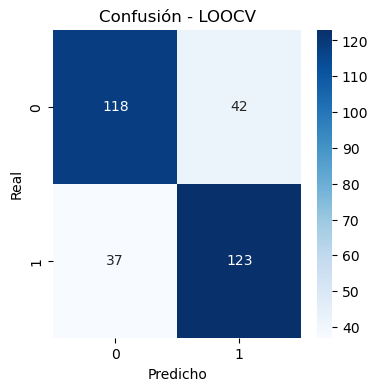

In [230]:


# Crear pipeline con Árbol de Decisión
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")


In [231]:
accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

              Método  Accuracy
0              LOOCV  0.753125
1             K-Fold  0.737500
2  Stratified K-Fold  0.734375
3           Hold-Out  0.687500


In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
print("Precision:", precision_score(y_smote, y_pred_loo_SMOTE))
print("Recall:", recall_score(y_smote, y_pred_loo_SMOTE))
print("F1-score:", f1_score(y_smote, y_pred_loo_SMOTE))


Accuracy: 0.753125
Precision: 0.7454545454545455
Recall: 0.76875
F1-score: 0.7569230769230769


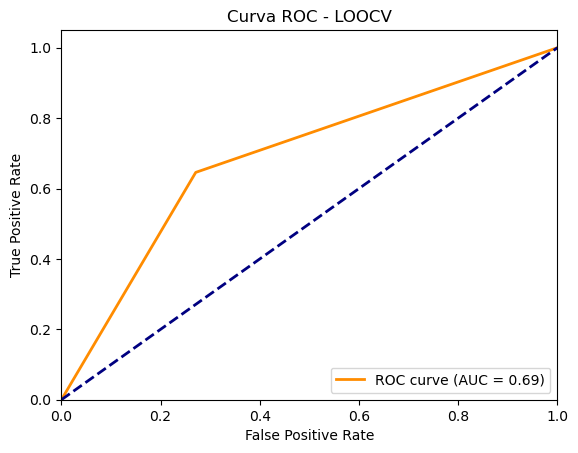

In [233]:
y_prob_LOOCV_SMOTE = pipeline.predict_proba(X_test_SMOTE)[:, 1]

# Calcula los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_prob_LOOCV_SMOTE)

# Calcula el AUC
roc_auc = roc_auc_score(y_test_SMOTE, y_prob_LOOCV_SMOTE)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LOOCV')
plt.legend(loc="lower right")
plt.show()

## Random Forest (Bagging)

Hold-Out
Accuracy: 0.7604166666666666


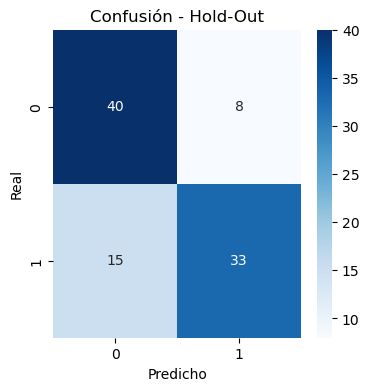

K-Fold
Accuracy: 0.8


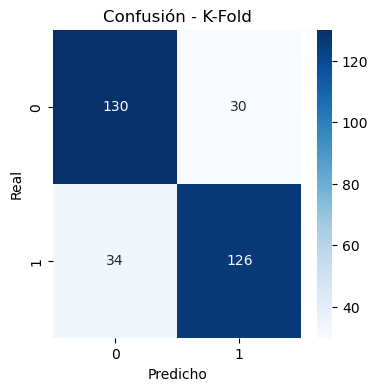

Stratified K-Fold
Accuracy: 0.803125


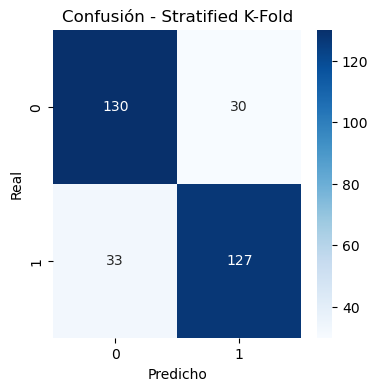

LOOCV (Leave-One-Out)
Accuracy: 0.8


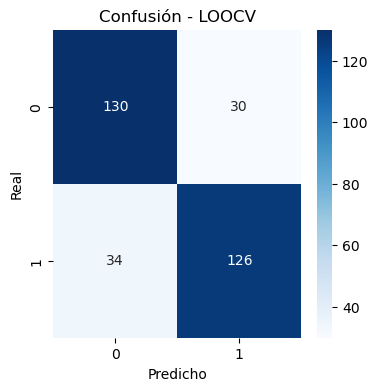

In [234]:

# Pipeline con Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")

In [235]:
accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

              Método  Accuracy
0  Stratified K-Fold  0.803125
1             K-Fold  0.800000
2              LOOCV  0.800000
3           Hold-Out  0.760417


In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
print("Precision:", precision_score(y_smote, y_pred_skf_SMOTE))
print("Recall:", recall_score(y_smote, y_pred_skf_SMOTE))
print("F1-score:", f1_score(y_smote, y_pred_skf_SMOTE))


Accuracy: 0.803125
Precision: 0.8089171974522293
Recall: 0.79375
F1-score: 0.8012618296529969


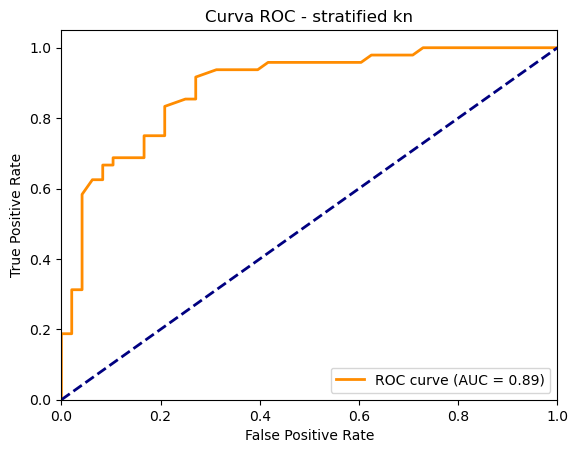

In [237]:
y_prob_skf_SMOTE = pipeline.predict_proba(X_test_SMOTE)[:, 1]

# Calcula los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_prob_skf_SMOTE)

# Calcula el AUC
roc_auc = roc_auc_score(y_test_SMOTE, y_prob_skf_SMOTE)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - stratified kn')
plt.legend(loc="lower right")
plt.show()

## Adaboost (Boosting)

Hold-Out
Accuracy: 0.84375


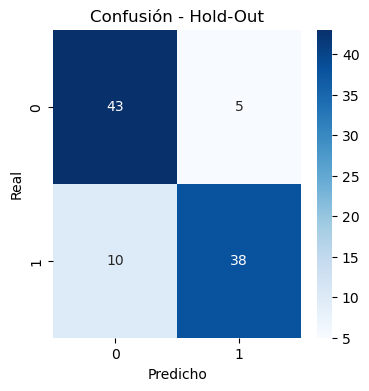

K-Fold
Accuracy: 0.809375


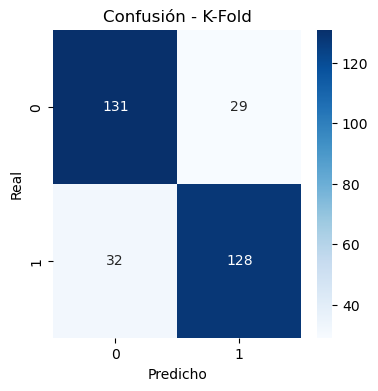

Stratified K-Fold
Accuracy: 0.815625


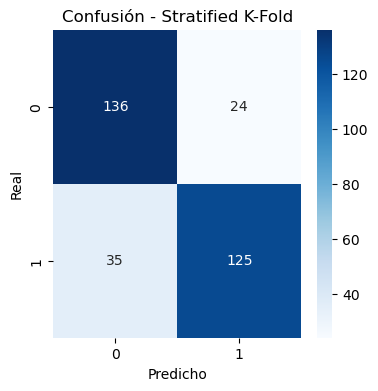

LOOCV (Leave-One-Out)
Accuracy: 0.80625


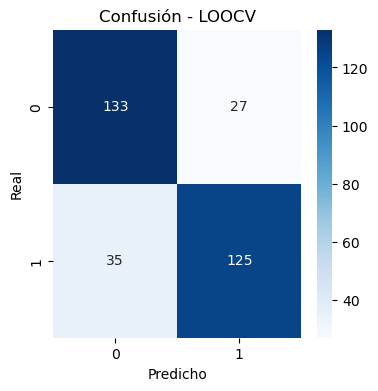

In [238]:
# Pipeline con AdaBoost (Boosting)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=42))
])

print("Hold-Out")
# Dividir el dataset balanceado
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(
    X_smote, y_smote,
    test_size=0.30,
    stratify=y_smote,
    random_state=1
)

pipeline.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_holdout_SMOTE = pipeline.predict(X_test_SMOTE)
print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
plot_confusion(y_test_SMOTE, y_pred_holdout_SMOTE, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
print("Accuracy:", accuracy_score(y_smote, y_pred_kf_SMOTE))
plot_confusion(y_smote, y_pred_kf_SMOTE, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
print("Accuracy:", accuracy_score(y_smote, y_pred_skf_SMOTE))
plot_confusion(y_smote, y_pred_skf_SMOTE, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_SMOTE = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
print("Accuracy:", accuracy_score(y_smote, y_pred_loo_SMOTE))
plot_confusion(y_smote, y_pred_loo_SMOTE, "Confusión - LOOCV")


In [239]:
accuracy_holdout = accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE)
accuracy_kfold = accuracy_score(y_smote, y_pred_kf_SMOTE)
accuracy_stratkfold = accuracy_score(y_smote, y_pred_skf_SMOTE)
accuracy_loo = accuracy_score(y_smote, y_pred_loo_SMOTE)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar la tabla ordenada de mayor a menor accuracy
print(resultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

              Método  Accuracy
0           Hold-Out  0.843750
1  Stratified K-Fold  0.815625
2             K-Fold  0.809375
3              LOOCV  0.806250


In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Precision:", precision_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("Recall:", recall_score(y_test_SMOTE, y_pred_holdout_SMOTE))
print("F1-score:", f1_score(y_test_SMOTE, y_pred_holdout_SMOTE))


Accuracy: 0.84375
Precision: 0.8837209302325582
Recall: 0.7916666666666666
F1-score: 0.8351648351648352


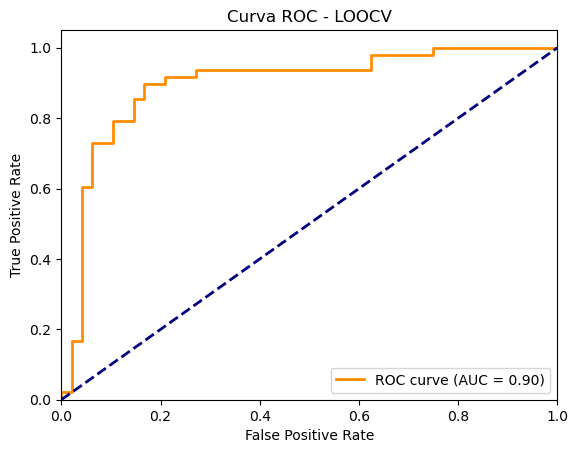

In [241]:
y_prob_holdout_SMOTE = pipeline.predict_proba(X_test_SMOTE)[:, 1]

# Calcula los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_prob_holdout_SMOTE)

# Calcula el AUC
roc_auc = roc_auc_score(y_test_SMOTE, y_prob_holdout_SMOTE)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LOOCV')
plt.legend(loc="lower right")
plt.show()

In [242]:

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Tabla para guardar resultados
resultados = {
    "Modelo": [],
    "Hold-Out": [],
    "K-Fold": [],
    "Stratified K-Fold": [],
    "LOOCV": []
}

# Evaluación de todos los modelos
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', modelo)
    ])

    # Hold-Out
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, stratify=y_smote, random_state=1)
    pipeline.fit(X_train, y_train)
    y_pred_holdout = pipeline.predict(X_test)
    acc_holdout = accuracy_score(y_test, y_pred_holdout)

    # K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_kfold = cross_val_predict(pipeline, X_smote, y_smote, cv=kf)
    acc_kfold = accuracy_score(y_smote, y_pred_kfold)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_stratkfold = cross_val_predict(pipeline, X_smote, y_smote, cv=skf)
    acc_stratkfold = accuracy_score(y_smote, y_pred_stratkfold)

    loo = LeaveOneOut()
    y_pred_loo = cross_val_predict(pipeline, X_smote, y_smote, cv=loo)
    acc_loo = accuracy_score(y_smote, y_pred_loo)
   

    # Guardar resultados
    resultados["Modelo"].append(nombre)
    resultados["Hold-Out"].append(round(acc_holdout, 4))
    resultados["K-Fold"].append(round(acc_kfold, 4))
    resultados["Stratified K-Fold"].append(round(acc_stratkfold, 4))
    resultados["LOOCV"].append("-" if acc_loo is None else round(acc_loo, 4))

df_resultados = pd.DataFrame(resultados)
md = "### Comparación de Accuracy con SMOTE \n\n"
md += df_resultados.to_markdown(index=False)
display(Markdown(md))


### Comparación de Accuracy con SMOTE 

| Modelo              |   Hold-Out |   K-Fold |   Stratified K-Fold |   LOOCV |
|:--------------------|-----------:|---------:|--------------------:|--------:|
| Regresión Logística |     0.7917 |   0.7969 |              0.7906 |  0.7906 |
| SVM                 |     0.8229 |   0.8187 |              0.7906 |  0.8031 |
| KNN                 |     0.8021 |   0.7844 |              0.7937 |  0.775  |
| Árbol de Decisión   |     0.6875 |   0.7375 |              0.7344 |  0.7531 |
| Random Forest       |     0.7604 |   0.8    |              0.8031 |  0.8    |
| AdaBoost            |     0.8438 |   0.8094 |              0.8156 |  0.8063 |

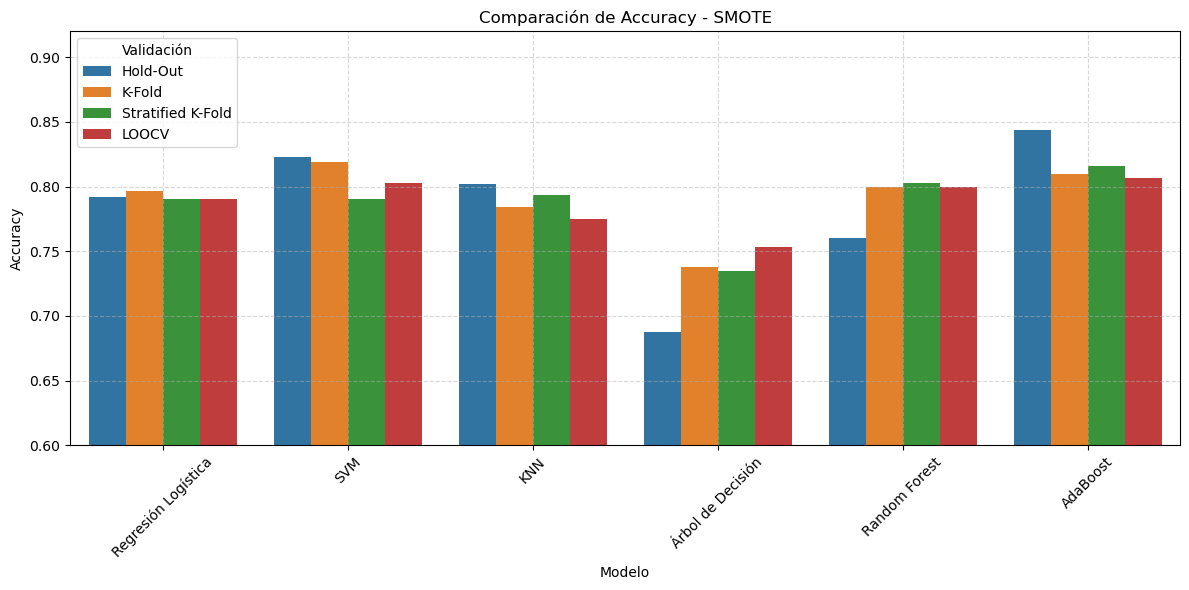

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Si usaste el DataFrame llamado df_resultados para SMOTE:
df_smote = df_resultados.copy()

# Convertir a formato largo para graficar
df_smote_melted = df_smote.melt(id_vars="Modelo", var_name="Método", value_name="Accuracy")

# Asegúrate de tener valores numéricos
df_smote_melted = df_smote_melted[df_smote_melted["Accuracy"] != "-"]
df_smote_melted["Accuracy"] = df_smote_melted["Accuracy"].astype(float)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_smote_melted, x="Modelo", y="Accuracy", hue="Método")
plt.title("Comparación de Accuracy - SMOTE")
plt.xticks(rotation=45)
plt.ylim(0.60, 0.92)
plt.tight_layout()
plt.legend(title="Validación")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# UNDERSAMPLING
## Logistic Regresion

Hold-Out
Accuracy: 0.7710843373493976


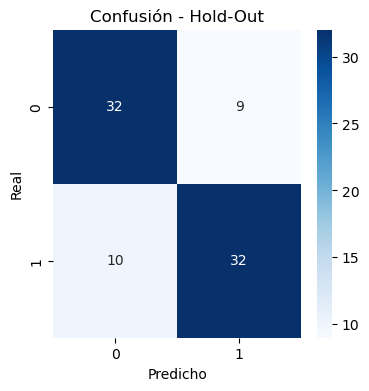

K-Fold
Accuracy: 0.781021897810219


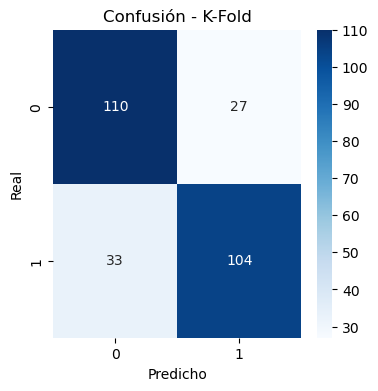

Stratified K-Fold
Accuracy: 0.7956204379562044


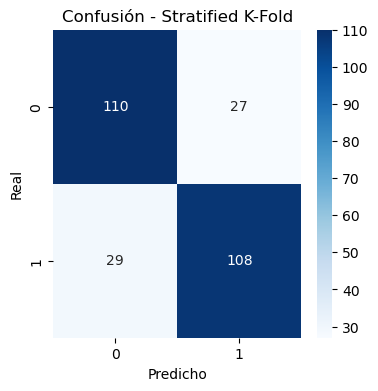

LOOCV (Leave-One-Out)
Accuracy: 0.8065693430656934


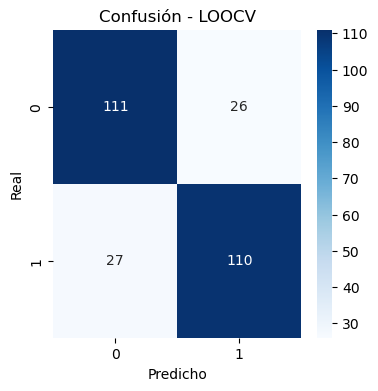

In [244]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline con regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

print("Hold-Out")
# Dividir el dataset balanceado por undersampling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under,
    test_size=0.30,
    stratify=y_under,
    random_state=1
)

pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [245]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_under = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar tabla ordenada de mayor a menor accuracy
print(resultados_under.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0              LOOCV  0.806569
1  Stratified K-Fold  0.795620
2             K-Fold  0.781022
3           Hold-Out  0.771084


In [246]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy:", round(accuracy_loo, 4))
print("Precision:", precision_score(y_under, y_pred_loo_under))
print("Recall:", recall_score(y_under, y_pred_loo_under))
print("F1-score:", f1_score(y_under, y_pred_loo_under))


Accuracy: 0.8066
Precision: 0.8088235294117647
Recall: 0.8029197080291971
F1-score: 0.8058608058608059


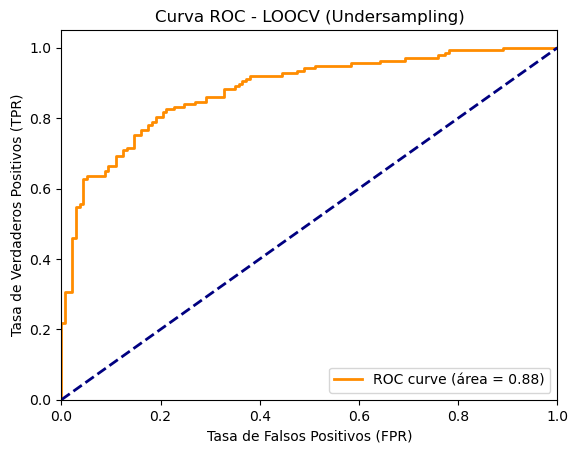

In [247]:

y_prob_loo = cross_val_predict(pipeline, X_under, y_under, cv=loo, method='predict_proba')[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_under, y_prob_loo)
roc_auc = roc_auc_score(y_under, y_prob_loo)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - LOOCV (Undersampling)')
plt.legend(loc="lower right")
plt.show()


## SVM Undersampling

Hold-Out
Accuracy: 0.7710843373493976


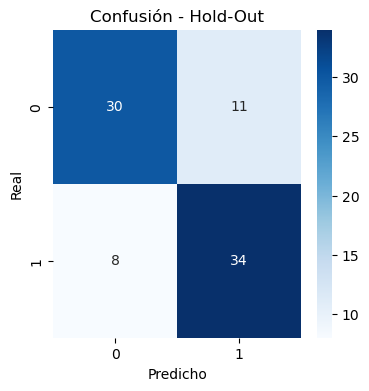

K-Fold
Accuracy: 0.781021897810219


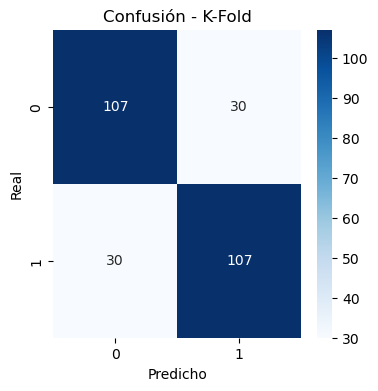

Stratified K-Fold
Accuracy: 0.791970802919708


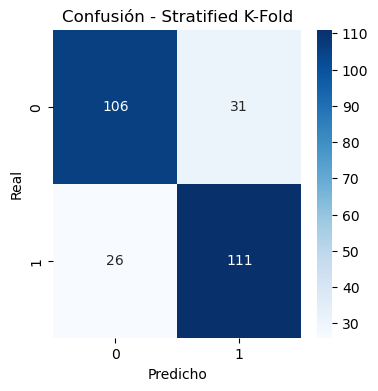

LOOCV (Leave-One-Out)
Accuracy: 0.791970802919708


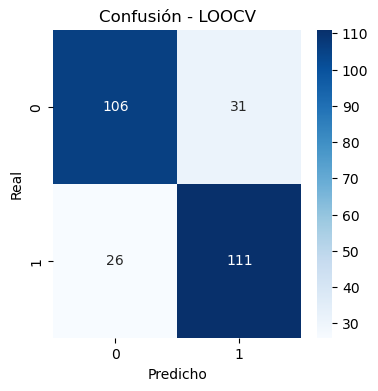

In [248]:
# Pipeline con SVM

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

print("Hold-Out")
# Dividir el dataset balanceado por undersampling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under,
    test_size=0.30,
    stratify=y_under,
    random_state=1
)

pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [249]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_svm_under = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar tabla ordenada de mayor a menor accuracy
print(resultados_svm_under.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0              LOOCV  0.791971
1  Stratified K-Fold  0.791971
2             K-Fold  0.781022
3           Hold-Out  0.771084


In [250]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy:", accuracy_stratkfold)
print("Precision:", precision_score(y_under, y_pred_skf_under))
print("Recall:", recall_score(y_under, y_pred_skf_under))
print("F1-score:", f1_score(y_under, y_pred_skf_under))


Accuracy: 0.791970802919708
Precision: 0.7816901408450704
Recall: 0.8102189781021898
F1-score: 0.7956989247311828


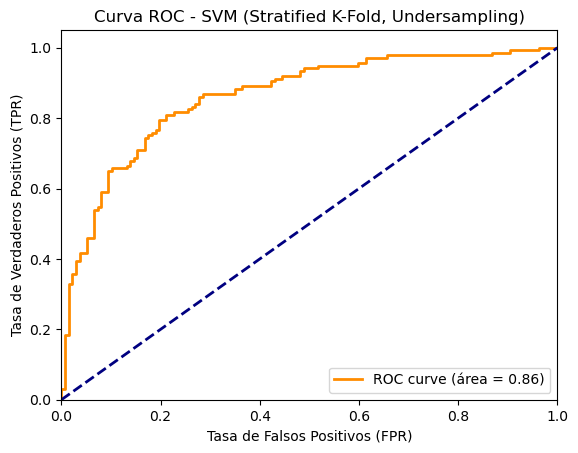

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades predichas con Stratified K-Fold
y_prob_skf_svm = cross_val_predict(pipeline, X_under, y_under, cv=skf, method='predict_proba')[:, 1]

# Calcular FPR, TPR y AUC
fpr, tpr, thresholds = roc_curve(y_under, y_prob_skf_svm)
roc_auc = roc_auc_score(y_under, y_prob_skf_svm)

# Gráfica ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - SVM (Stratified K-Fold, Undersampling)')
plt.legend(loc="lower right")
plt.show()


## Knn Undersampling

Hold-Out
Accuracy: 0.7228915662650602


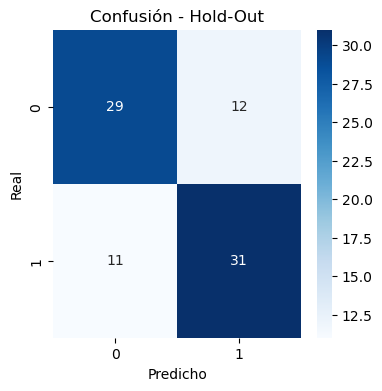

K-Fold
Accuracy: 0.7737226277372263


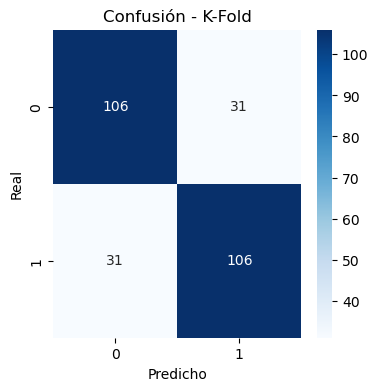

Stratified K-Fold
Accuracy: 0.791970802919708


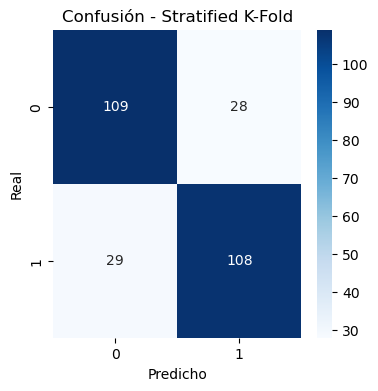

LOOCV (Leave-One-Out)
Accuracy: 0.7956204379562044


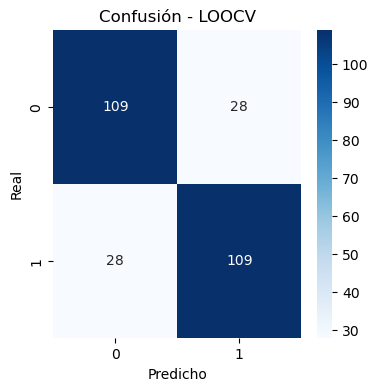

In [252]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

print("Hold-Out")
# Dividir el dataset balanceado por undersampling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under,
    test_size=0.30,
    stratify=y_under,
    random_state=1
)

pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# 2. K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# 3. Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# 4. LOOCV
print("LOOCV (Leave-One-Out)")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [253]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_svm_under = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar tabla ordenada de mayor a menor accuracy
print(resultados_svm_under.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0              LOOCV  0.795620
1  Stratified K-Fold  0.791971
2             K-Fold  0.773723
3           Hold-Out  0.722892


In [254]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy:", accuracy_loo)
print("Precision:", precision_score(y_under, y_pred_loo_under))
print("Recall:", recall_score(y_under, y_pred_loo_under))
print("F1-score:", f1_score(y_under, y_pred_loo_under))


Accuracy: 0.7956204379562044
Precision: 0.7956204379562044
Recall: 0.7956204379562044
F1-score: 0.7956204379562044


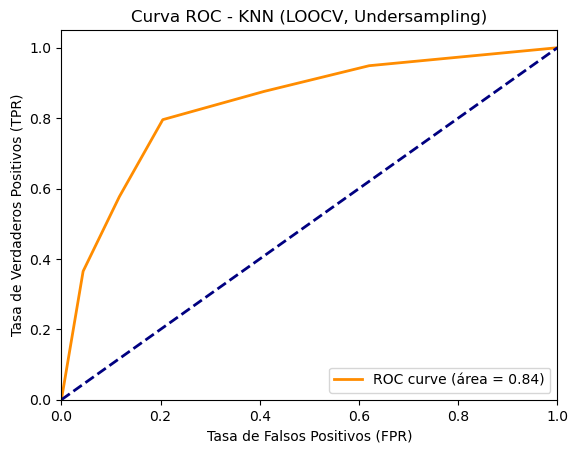

In [255]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades con LOOCV (Asegúrate de que `pipeline` contenga KNN)
y_prob_loo_knn = cross_val_predict(pipeline, X_under, y_under, cv=loo, method='predict_proba')[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_under, y_prob_loo_knn)
roc_auc = roc_auc_score(y_under, y_prob_loo_knn)

# Gráfica ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN (LOOCV, Undersampling)')
plt.legend(loc="lower right")
plt.show()


## Árbol de decisión modelo base

Hold-Out
Accuracy: 0.7228915662650602


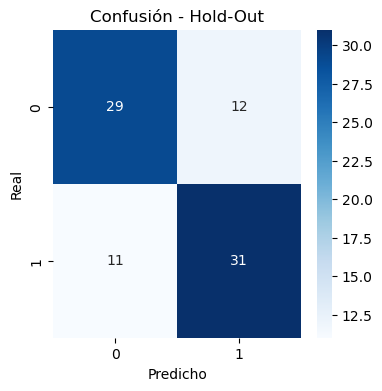

K-Fold
Accuracy: 0.708029197080292


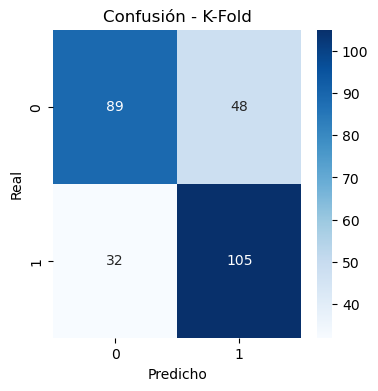

Stratified K-Fold
Accuracy: 0.7043795620437956


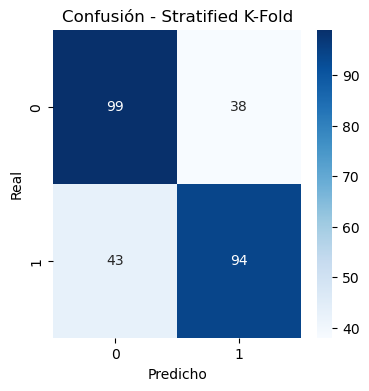

LOOCV
Accuracy: 0.6423357664233577


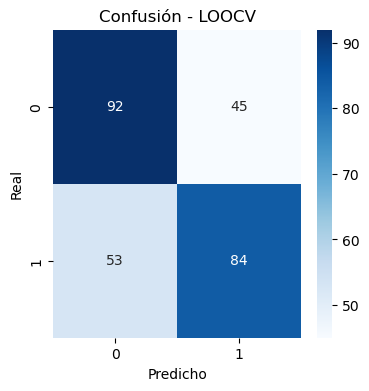

In [256]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Hold-Out
print("Hold-Out")
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.30, stratify=y_under, random_state=1
)
pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# LOOCV
print("LOOCV")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [257]:
import pandas as pd
from sklearn.metrics import accuracy_score

accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_arbol = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

# Mostrar tabla ordenada
print(resultados_arbol.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0           Hold-Out  0.722892
1             K-Fold  0.708029
2  Stratified K-Fold  0.704380
3              LOOCV  0.642336


In [258]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Ya tienes el valor de accuracy previamente calculado:
accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)

print("Accuracy:", round(accuracy_holdout, 4))
print("Precision:", precision_score(y_test_under, y_pred_holdout_under))
print("Recall:", recall_score(y_test_under, y_pred_holdout_under))
print("F1-score:", f1_score(y_test_under, y_pred_holdout_under))


Accuracy: 0.7229
Precision: 0.7209302325581395
Recall: 0.7380952380952381
F1-score: 0.7294117647058823


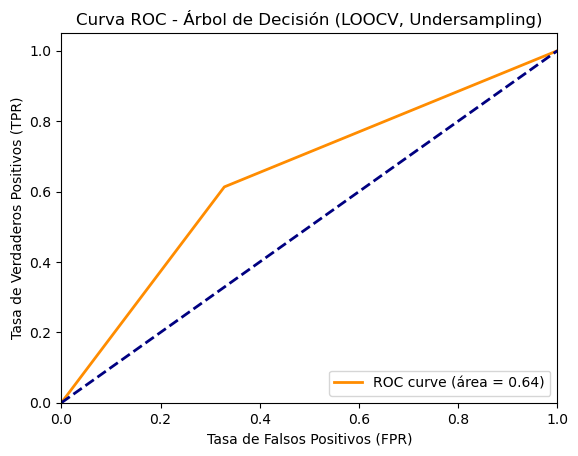

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades con LOOCV
y_prob_loo = cross_val_predict(pipeline, X_under, y_under, cv=loo, method='predict_proba')[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_under, y_prob_loo)
roc_auc = roc_auc_score(y_under, y_prob_loo)

# Gráfica ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Árbol de Decisión (LOOCV, Undersampling)')
plt.legend(loc="lower right")
plt.show()


## RANDOM FOREST (Bagging)


Hold-Out
Accuracy: 0.7831325301204819


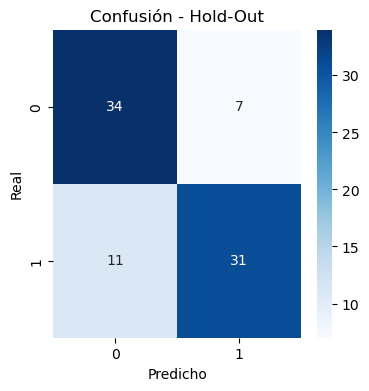

K-Fold
Accuracy: 0.7554744525547445


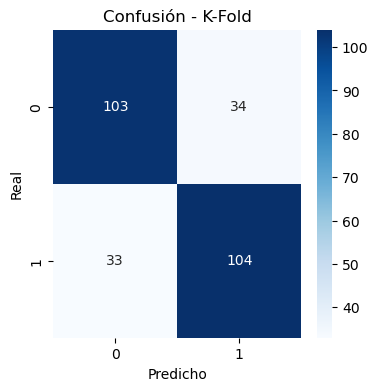

Stratified K-Fold
Accuracy: 0.8065693430656934


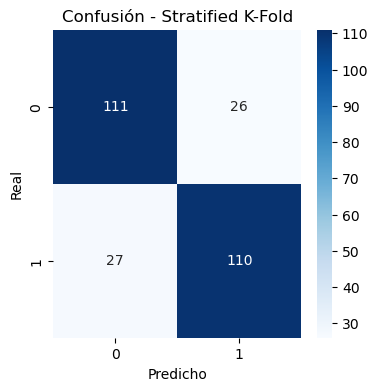

LOOCV
Accuracy: 0.7956204379562044


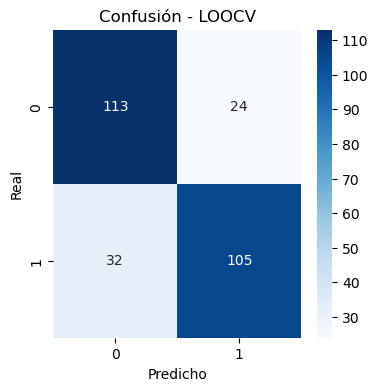

In [271]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Hold-Out
print("Hold-Out")
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.30, stratify=y_under, random_state=1
)
pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# LOOCV
print("LOOCV")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [272]:
import pandas as pd

accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_rf = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

print(resultados_rf.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0  Stratified K-Fold  0.806569
1              LOOCV  0.795620
2           Hold-Out  0.783133
3             K-Fold  0.755474


In [273]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy:", accuracy_stratkfold)
print("Precision:", precision_score(y_under, y_pred_skf_under))
print("Recall:", recall_score(y_under, y_pred_skf_under))
print("F1-score:", f1_score(y_under, y_pred_skf_under))


Accuracy: 0.8065693430656934
Precision: 0.8088235294117647
Recall: 0.8029197080291971
F1-score: 0.8058608058608059


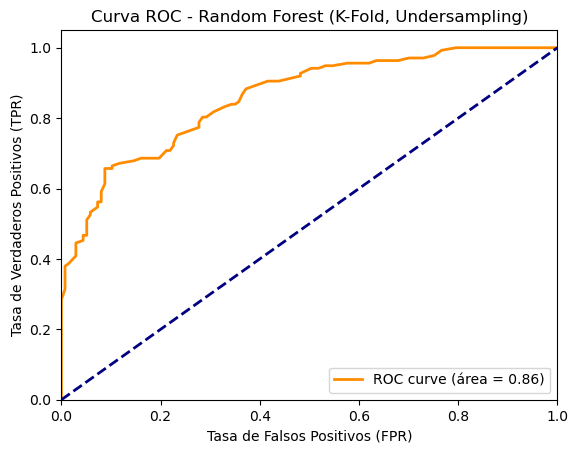

In [274]:

y_prob_kf_rf = cross_val_predict(pipeline, X_under, y_under, cv=kf, method='predict_proba')[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_under, y_prob_kf_rf)
roc_auc = roc_auc_score(y_under, y_prob_kf_rf)

# Gráfica ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest (K-Fold, Undersampling)')
plt.legend(loc="lower right")
plt.show()


## AdaBoost con Undersampling

Hold-Out
Accuracy: 0.7951807228915663


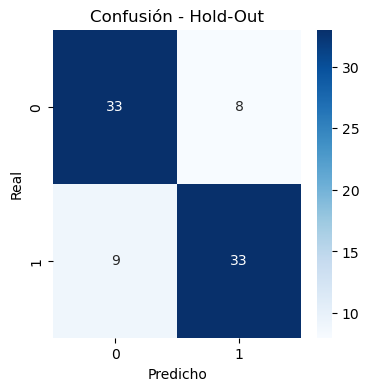

K-Fold
Accuracy: 0.7956204379562044


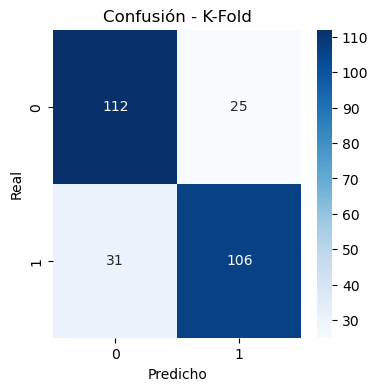

Stratified K-Fold
Accuracy: 0.8211678832116789


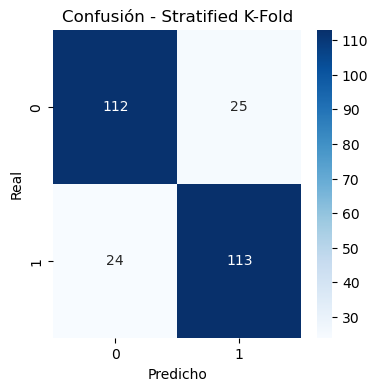

LOOCV
Accuracy: 0.7883211678832117


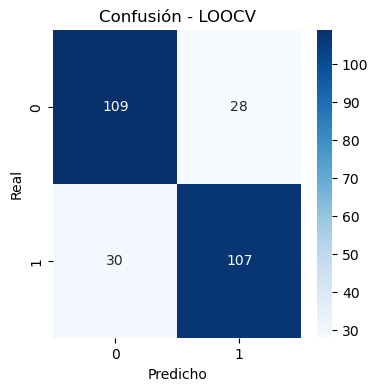

In [275]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Función para graficar matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Hold-Out
print("Hold-Out")
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.30, stratify=y_under, random_state=1
)
pipeline.fit(X_train_under, y_train_under)
y_pred_holdout_under = pipeline.predict(X_test_under)
print("Accuracy:", accuracy_score(y_test_under, y_pred_holdout_under))
plot_confusion(y_test_under, y_pred_holdout_under, "Confusión - Hold-Out")

# K-Fold
print("K-Fold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf_under = cross_val_predict(pipeline, X_under, y_under, cv=kf)
print("Accuracy:", accuracy_score(y_under, y_pred_kf_under))
plot_confusion(y_under, y_pred_kf_under, "Confusión - K-Fold")

# Stratified K-Fold
print("Stratified K-Fold")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_skf_under = cross_val_predict(pipeline, X_under, y_under, cv=skf)
print("Accuracy:", accuracy_score(y_under, y_pred_skf_under))
plot_confusion(y_under, y_pred_skf_under, "Confusión - Stratified K-Fold")

# LOOCV
print("LOOCV")
loo = LeaveOneOut()
y_pred_loo_under = cross_val_predict(pipeline, X_under, y_under, cv=loo)
print("Accuracy:", accuracy_score(y_under, y_pred_loo_under))
plot_confusion(y_under, y_pred_loo_under, "Confusión - LOOCV")


In [276]:
accuracy_holdout = accuracy_score(y_test_under, y_pred_holdout_under)
accuracy_kfold = accuracy_score(y_under, y_pred_kf_under)
accuracy_stratkfold = accuracy_score(y_under, y_pred_skf_under)
accuracy_loo = accuracy_score(y_under, y_pred_loo_under)

resultados_ada = pd.DataFrame({
    "Método": ["Hold-Out", "K-Fold", "Stratified K-Fold", "LOOCV"],
    "Accuracy": [accuracy_holdout, accuracy_kfold, accuracy_stratkfold, accuracy_loo]
})

print(resultados_ada.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


              Método  Accuracy
0  Stratified K-Fold  0.821168
1             K-Fold  0.795620
2           Hold-Out  0.795181
3              LOOCV  0.788321


In [278]:

print("Accuracy:", round(accuracy_score(y_under, y_pred_skf_under), 4))
print("Precision:", round(precision_score(y_under, y_pred_skf_under), 4))
print("Recall:", round(recall_score(y_under, y_pred_skf_under), 4))
print("F1-score:", round(f1_score(y_under, y_pred_skf_under), 4))


Accuracy: 0.8212
Precision: 0.8188
Recall: 0.8248
F1-score: 0.8218


Viendo esto se escoge la metrica k-fold ya que aunque tenga el mismo accuracy que loocv cuenta con una mayor precision y un mejor recall 

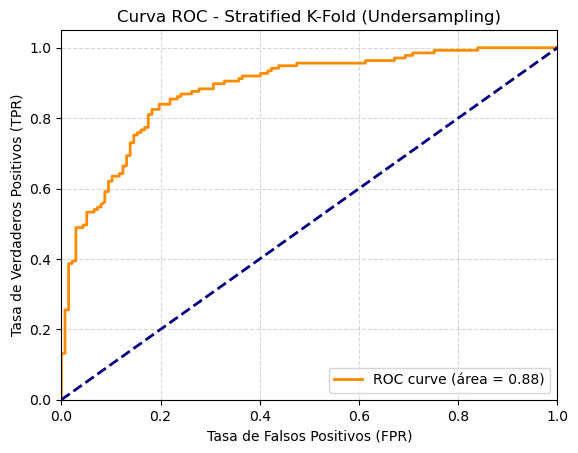

In [280]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# Asegúrate de haber definido pipeline con un modelo que tenga predict_proba
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Obtener probabilidades estimadas de la clase positiva
y_prob_skf = cross_val_predict(pipeline, X_under, y_under, cv=skf, method='predict_proba')[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_under, y_prob_skf)
roc_auc = roc_auc_score(y_under, y_prob_skf)

# Gráfica ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Stratified K-Fold (Undersampling)')
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [281]:

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Tabla para guardar resultados
resultados = {
    "Modelo": [],
    "Hold-Out": [],
    "K-Fold": [],
    "Stratified K-Fold": [],
    "LOOCV": []
}

# Evaluación de todos los modelos usando UNDERSAMPLING
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', modelo)
    ])

    # Hold-Out
    X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.30, stratify=y_under, random_state=1)
    pipeline.fit(X_train, y_train)
    y_pred_holdout = pipeline.predict(X_test)
    acc_holdout = accuracy_score(y_test, y_pred_holdout)

    # K-Fold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_kfold = cross_val_predict(pipeline, X_under, y_under, cv=kf)
    acc_kfold = accuracy_score(y_under, y_pred_kfold)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_stratkfold = cross_val_predict(pipeline, X_under, y_under, cv=skf)
    acc_stratkfold = accuracy_score(y_under, y_pred_stratkfold)

    # LOOCV
    loo = LeaveOneOut()
    y_pred_loo = cross_val_predict(pipeline, X_under, y_under, cv=loo)
    acc_loo = accuracy_score(y_under, y_pred_loo)

    # Guardar resultados
    resultados["Modelo"].append(nombre)
    resultados["Hold-Out"].append(round(acc_holdout, 4))
    resultados["K-Fold"].append(round(acc_kfold, 4))
    resultados["Stratified K-Fold"].append(round(acc_stratkfold, 4))
    resultados["LOOCV"].append(round(acc_loo, 4) if acc_loo is not None else "-")

# Convertir en DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar en markdown
md = "### Comparación de Accuracy con Undersampling \n\n"
md += df_resultados.to_markdown(index=False)
display(Markdown(md))


### Comparación de Accuracy con Undersampling 

| Modelo              |   Hold-Out |   K-Fold |   Stratified K-Fold |   LOOCV |
|:--------------------|-----------:|---------:|--------------------:|--------:|
| Regresión Logística |     0.7711 |   0.781  |              0.7956 |  0.8066 |
| SVM                 |     0.7711 |   0.781  |              0.792  |  0.792  |
| KNN                 |     0.7229 |   0.7737 |              0.792  |  0.7956 |
| Árbol de Decisión   |     0.7229 |   0.708  |              0.7044 |  0.6423 |
| Random Forest       |     0.7831 |   0.7555 |              0.8066 |  0.7956 |
| AdaBoost            |     0.7952 |   0.7956 |              0.8212 |  0.7883 |

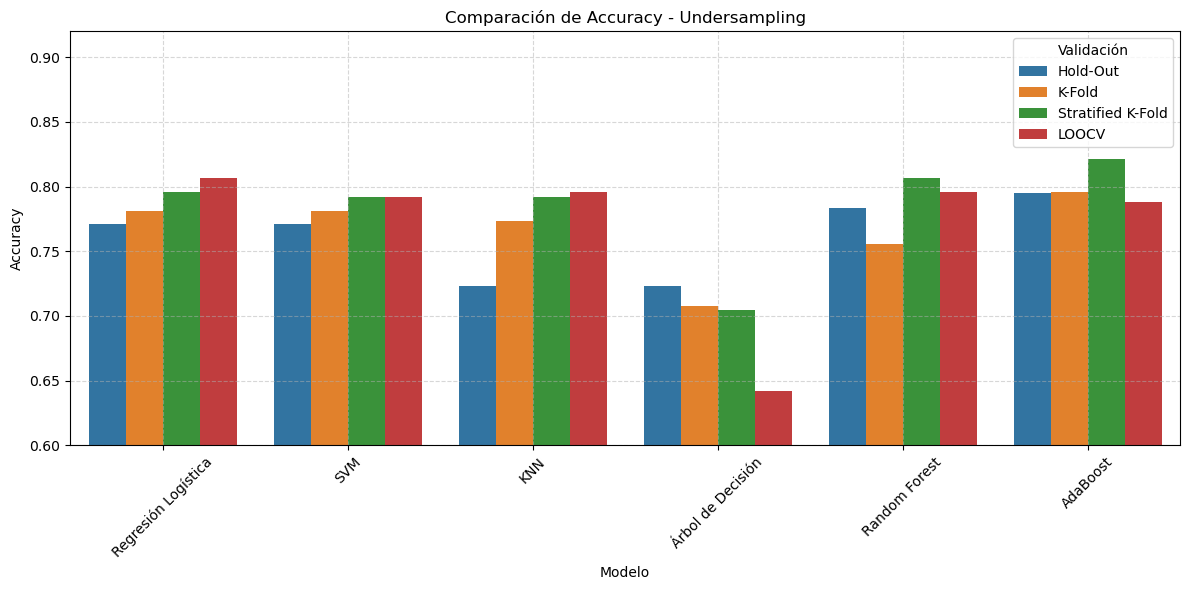

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Si usaste el DataFrame llamado df_resultados para Undersampling:
df_under = df_resultados.copy()

# Convertir a formato largo para graficar
df_under_melted = df_under.melt(id_vars="Modelo", var_name="Método", value_name="Accuracy")

# Asegúrate de tener valores numéricos
df_under_melted = df_under_melted[df_under_melted["Accuracy"] != "-"]
df_under_melted["Accuracy"] = df_under_melted["Accuracy"].astype(float)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_under_melted, x="Modelo", y="Accuracy", hue="Método")
plt.title("Comparación de Accuracy - Undersampling")
plt.xticks(rotation=45)
plt.ylim(0.60, 0.92)
plt.tight_layout()
plt.legend(title="Validación")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##